In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
funnel  = pd.read_csv("C:\\Users\\YunanYan\\Downloads\\loyalty_funnel.csv")

In [3]:
# From bof - 1st use
print((funnel.shape[0]-funnel.BOF_1_HIT_TIME.isna().sum())/funnel.shape[0])
print(funnel.BOF_1_HIT_TIME.mean())
print(funnel.BOF_1_NUMBER_OF_RECEIVED_ENGAGEMENT.mean())
print(funnel.BOF_1_NUMBER_OF_OPENNED_ENGAGEMENT.mean())

0.7078877400295421
2.954761706034555
0.05997045790251108
0.023515509601181685


In [4]:
# From 1st - 2nd use
print((funnel.shape[0]-funnel.BOF_2_HIT_TIME.isna().sum())/funnel.shape[0])
print(funnel.BOF_2_HIT_TIME.mean())
print(funnel.BOF_2_NUMBER_OF_RECEIVED_ENGAGEMENT.mean())
print(funnel.BOF_2_NUMBER_OF_OPENNED_ENGAGEMENT.mean())

0.6756868537666174
1.505683805526408
0.02605612998522895
0.011935007385524372


In [5]:
# From 2nd - 3rd use
print((funnel.shape[0]-funnel.BOF_3_HIT_TIME.isna().sum())/funnel.shape[0])
print(funnel.BOF_3_HIT_TIME.mean())
print(funnel.BOF_3_NUMBER_OF_RECEIVED_ENGAGEMENT.mean())
print(funnel.BOF_3_NUMBER_OF_OPENNED_ENGAGEMENT.mean())

0.6555391432791728
1.1700766110860747
0.022806499261447562
0.009867060561299852


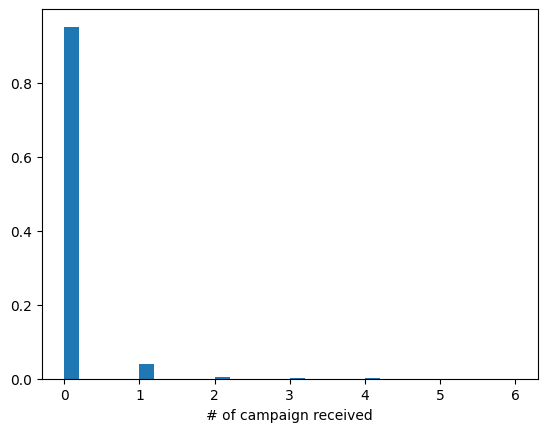

In [6]:
weights = np.ones_like(funnel.BOF_1_NUMBER_OF_RECEIVED_ENGAGEMENT) / len(funnel.BOF_1_NUMBER_OF_RECEIVED_ENGAGEMENT)
plt.hist(funnel.BOF_1_NUMBER_OF_RECEIVED_ENGAGEMENT, bins=30, weights=weights)
plt.xlabel("# of campaign received")
plt.show()

In [10]:
# GPV
gpv_seg = pd.read_csv("C:\\Users\\YunanYan\\Downloads\\loyalty_seg.csv")
gpv_seg.MERCHANT_SEGMENT.value_counts()

MERCHANT_SEGMENT
Micro         10463
SMB            3606
Mid-Market     1111
Inactive        454
Name: count, dtype: int64

In [12]:
funnel_gpv_seg = funnel.merge(gpv_seg, how="inner",on="MERCHANT_TOKEN")
seg_list = funnel_gpv_seg.MERCHANT_SEGMENT.unique().tolist()
for seg in seg_list:
    data_seg = funnel_gpv_seg[(funnel_gpv_seg.MERCHANT_SEGMENT==seg)]
    print(seg)
    print("-----------")
    print(data_seg.shape[0])
    print((data_seg.shape[0]-data_seg.BOF_1_HIT_TIME.isna().sum())/data_seg.shape[0])
    print((data_seg.shape[0]-data_seg.BOF_2_HIT_TIME.isna().sum())/data_seg.shape[0])
    print((data_seg.shape[0]-data_seg.BOF_3_HIT_TIME.isna().sum())/data_seg.shape[0])
  

Micro
-----------
10463
0.693395775590175
0.6488578801490968
0.6209500143362324
SMB
-----------
3606
0.9584026622296173
0.9511924570160843
0.9431503050471437
nan
-----------
0
nan
nan
nan
Inactive
-----------
454
0.1299559471365639
0.1013215859030837
0.09030837004405286
Mid-Market
-----------
1111
0.9621962196219622
0.9567956795679567
0.9540954095409541


C:\Users\YunanYan\AppData\Local\Temp\ipykernel_11972\3426519861.py:8: RuntimeWarning: invalid value encountered in scalar divide
  print((data_seg.shape[0]-data_seg.BOF_1_HIT_TIME.isna().sum())/data_seg.shape[0])
C:\Users\YunanYan\AppData\Local\Temp\ipykernel_11972\3426519861.py:9: RuntimeWarning: invalid value encountered in scalar divide
  print((data_seg.shape[0]-data_seg.BOF_2_HIT_TIME.isna().sum())/data_seg.shape[0])
C:\Users\YunanYan\AppData\Local\Temp\ipykernel_11972\3426519861.py:10: RuntimeWarning: invalid value encountered in scalar divide
  print((data_seg.shape[0]-data_seg.BOF_3_HIT_TIME.isna().sum())/data_seg.shape[0])


In [13]:
# MCC
mcc_seg = pd.read_csv("C:\\Users\\YunanYan\\Downloads\\loyalty_mcc_seg.csv")
mcc_seg.MCC.value_counts()

MCC
UNKNOWN                               11472
food_and_drink                         2077
retail                                 1422
beauty_and_personal_care                628
health_care_and_fitness                 346
professional_services                   345
casual_use                              182
home_and_repair                         166
leisure_and_entertainment               143
charities_education_and_membership      111
transportation                           33
Name: count, dtype: int64

In [14]:
# MCC segmentation analysis on time to convert 
funnel_mcc_seg = funnel.merge(mcc_seg, how="inner",on="MERCHANT_TOKEN")
seg_list = funnel_mcc_seg.MCC.unique().tolist()
for seg in seg_list:
    data_seg = funnel_mcc_seg[(funnel_mcc_seg.MCC==seg)]
    print(seg)
    print("-----------")
    print((data_seg.shape[0]-data_seg.BOF_1_HIT_TIME.isna().sum())/data_seg.shape[0])
    print((data_seg.shape[0]-data_seg.BOF_2_HIT_TIME.isna().sum())/data_seg.shape[0])
    print((data_seg.shape[0]-data_seg.BOF_3_HIT_TIME.isna().sum())/data_seg.shape[0])


UNKNOWN
-----------
0.7377092050209205
0.7053695955369595
0.6843619246861925
retail
-----------
0.6258790436005626
0.5921237693389592
0.5745428973277075
professional_services
-----------
0.22608695652173913
0.19420289855072465
0.1681159420289855
food_and_drink
-----------
0.8420799229658161
0.8218584496870486
0.8103033220991815
beauty_and_personal_care
-----------
0.6496815286624203
0.5923566878980892
0.552547770700637
casual_use
-----------
0.25824175824175827
0.23076923076923078
0.2032967032967033
health_care_and_fitness
-----------
0.5289017341040463
0.47398843930635837
0.4595375722543353
home_and_repair
-----------
0.16265060240963855
0.14457831325301204
0.13253012048192772
leisure_and_entertainment
-----------
0.4965034965034965
0.46853146853146854
0.45454545454545453
transportation
-----------
0.18181818181818182
0.18181818181818182
0.15151515151515152
charities_education_and_membership
-----------
0.5315315315315315
0.4774774774774775
0.4594594594594595
